# Regression in Prediction

**Course:** HUDK4050, Week 5

**Author:** Yutong Shen

**Assignment:** ICE3

## Simple Linear Regression

In [1]:
# Import necessary modules
from sklearn.linear_model import LinearRegression ## This is the module contains LR model
import pandas as pd 
import matplotlib.pyplot as plt ## This module helps you to plot some results

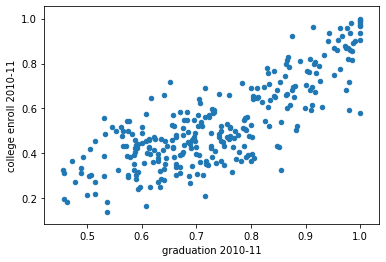

In [2]:
# Import data
school = pd.read_csv("../week 3/ICE1_Data.csv")
graduationCollege = school[['graduation 2010-11', 'college enroll 2010-11']].dropna()
# dropna() remove the rows that contains NaN values

graduation = graduationCollege.loc[:,"graduation 2010-11"].values.reshape(-1, 1)
college = graduationCollege.loc[:,"college enroll 2010-11"].values.reshape(-1, 1)

graduationCollege.plot.scatter(x = 'graduation 2010-11', y = 'college enroll 2010-11')

Step 1: We create a model (you can call it anything you like. In practice, I prefer explicit names such as collegeEnrollModel. It will really help you remember things you are doing. \
Step 2: Use the graduation and college data to fit the model. \
Step 3: Call the .intercept_ and .ceof_ to view what do you get.

In [3]:
model = LinearRegression()
model.fit(graduation, college)
print("The intercept is: ", model.intercept_)
print("The slope is: ", model.coef_)

The intercept is:  [-0.27965123]
The slope is:  [[1.09914898]]


In [4]:
college_pred = model.predict(graduation)
# call .predict() to use x as the input and get predicted ys.

Here the scatter plot between graduation and college is the same. But we are now adding a red line (which is graduation rate against predicted college enroll).

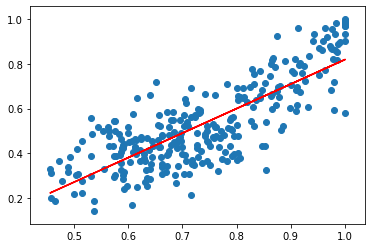

In [5]:
plt.scatter(graduation, college)
plt.plot(graduation, college_pred, color = 'red')
plt.show()

## A more realistic example with multiple independent variables

Here we are going to look at some interaction data from students watching on a class video. A project was proposed to collect data from student video watching, a sample of this data is available in the file ICE3data.csv.

stid = student id\
year = year student watched video\
participation = whether or not the student opened the video\
watch.time = how long the student watched the video for\
confusion.points = how many times a student rewatched a section of a video\
key.points = how many times a student skipped or increased the speed of a video\

Let's see if we can build a regressor to predict how long the student will watch a video for.

In [13]:
videoData = pd.read_csv("ICE3_data.csv")
videoData

,stid,year,video,participation,watch.time,confusion.points,key.points
0,1,2018,A,1,16.5,6,6
1,2,2018,A,0,0.0,0,0
2,3,2018,A,1,9.0,4,6
3,4,2018,A,1,20.0,8,5
4,5,2018,A,1,12.0,8,5
...,...,...,...,...,...,...,...
295,56,2019,E,1,12.0,6,2
296,57,2019,E,1,17.5,10,1
297,58,2019,E,1,6.0,4,1
298,59,2019,E,0,0.0,0,0


In [7]:
videoData.describe()

,stid,year,participation,watch.time,confusion.points,key.points
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,30.500000,2018.500000,0.743333,9.302500,4.426667,2.326667
std,17.347038,0.500835,0.437524,8.396475,3.606658,1.921526
min,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,2018.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,2018.500000,1.000000,8.375000,5.000000,2.000000
75%,45.250000,2019.000000,1.000000,15.750000,8.000000,4.000000
max,60.000000,2019.000000,1.000000,32.500000,13.000000,7.000000


Next, plot a scatter plot matrix to check (a) the potential linearity among variables, and (b) the distribution of each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5fa2ea290>,
      dtype=object)

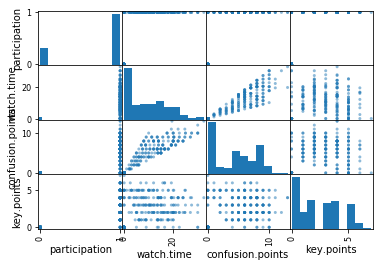

In [8]:
pd.plotting.scatter_matrix(videoData.iloc[:,3:])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5fa7d96d0>,
      dtype=object)

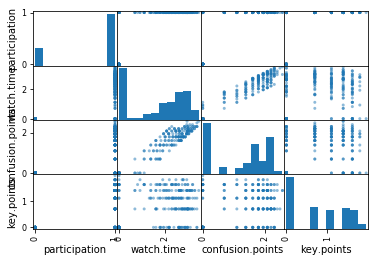

In [11]:
### NORMAL TRANFORMATION
from sklearn import preprocessing
import numpy as np


videoData['watchTime'] = [(x+1) if x == float(0) else x for x in videoData['watch.time']]
# videoData['watch.time'].mask(videoData['watch.time'] != 0 and videoData['watch.time'] != nan, 1)
videoData['watch.time'] = np.log(videoData['watchTime'])
# print(videoData['watchTimeLog'])

videoData['confusionPoints'] = [(x+1) if x == float(0) else x for x in videoData['confusion.points']]
videoData['confusion.points'] = np.log(videoData['confusionPoints'])
# print(videoData['confusionPointsLog'])

videoData['keyPoints'] = [(x+1) if x == float(0) else x for x in videoData['key.points']]
videoData['key.points'] = np.log(videoData['keyPoints'])
# print(videoData['keyPointsLog'])

pd.plotting.scatter_matrix(videoData[['participation','watch.time','confusion.points','key.points']])


# watchTime = videoData.loc[:,"watch.time"].values.reshape(-1, 1)
# # print(watchTime)
# watchTime = preprocessing.normalize([watchTime])

# confusionPoints = videoData.loc[:,"confusion.points"].values.reshape(-1, 1)
# # print(confusionPoints)
# confusionPoints = preprocessing.normalize([confusionPoints])

# keyPoints = videoData.loc[:,"key.points"].values.reshape(-1, 1)
# keyPoints = preprocessing.normalize([keyPoints])

# videoData.loc[:,4] = watchTime
 
# # pd.plotting.scatter_matrix(watchTime, confusionPoints)
# # normalized_arr = preprocessing.normalize([x_array])
# # print(normalized_arr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5fe524a10>,
      dtype=object)

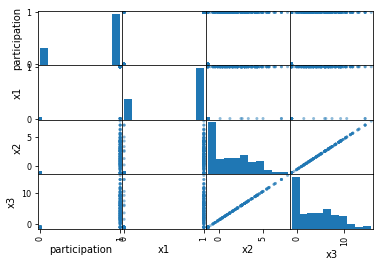

In [25]:
# videoData['watchTime'] = [(x+1) if x == float(0) else x for x in videoData['watch.time']]
# videoData['watch.time'].mask(videoData['watch.time'] != 0 and videoData['watch.time'] != nan, 1)
a=videoData['watch.time']
# videoData['x1'] = (a-np.mean(a))/np.std(a)
videoData['x1'] = preprocessing.normalize(np.array(a).reshape(-1,1))
# print(videoData['watchTimeLog'])
b=videoData['confusion.points']
# videoData['confusionPoints'] = [(x+1) if x == float(0) else x for x in videoData['confusion.points']]
# videoData['x2'] = (a-np.mean(b))/np.std(b)
videoData['x1'] = preprocessing.normalize(np.array(b).reshape(-1,1))
# print(videoData['confusionPointsLog'])
c=videoData['key.points']
# videoData['keyPoints'] = [(x+1) if x == float(0) else x for x in videoData['key.points']]
# videoData['x3'] = (a-np.mean(c))/np.std(c)
videoData['x1'] = preprocessing.normalize(np.array(c).reshape(-1,1))
# print(videoData['keyPointsLog'])

pd.plotting.scatter_matrix(videoData[['participation','x1','x2','x3']])

In [26]:
# use all the variables to predict watch.time
Xs = videoData[["participation", "x2", "x3"]].to_numpy()
watchTime = videoData.loc[:,"x1"].values.reshape(-1, 1)

videoModel = LinearRegression()
videoModel.fit(Xs, watchTime)
print("The intercept is: ", videoModel.intercept_)
print("The slope is: ", videoModel.coef_)

The intercept is:  [-0.01102705]
The slope is:  [[ 1.00908628 -0.00314526 -0.00590357]]


In [27]:
from statsmodels.api import OLS
videoModelOLS = OLS(watchTime, Xs)
videoModelOLSFit = videoModelOLS.fit()
print(videoModelOLSFit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     929.9
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          1.36e-128
Time:                        15:57:52   Log-Likelihood:                 109.80
No. Observations:                 300   AIC:                            -213.6
Df Residuals:                     297   BIC:                            -202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0091      0.029     34.318      0.0